In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt 
import warnings
warnings.filterwarnings("ignore")

In [26]:
#df2016=pd.read_csv("date-hour-soo-dest-2016.csv")
df=pd.read_csv("date-hour-soo-dest-2017.csv") #veri boyutundan dolayı sadece 2017 yılı aldım. 

In [4]:
#df=df2017.merge(df2016,how='outer')

In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df['Date']=pd.to_datetime(df['Date'])

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Weekday']=df['Date'].dt.dayofweek
df['Month_Name']=df['Date'].dt.month_name()
df['Weekday_Name']=df['Date'].dt.day_name()

df=df.drop('Date',axis=1)

In [27]:
df

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2017-01-01,0,12TH,19TH,1
1,2017-01-01,0,12TH,24TH,2
2,2017-01-01,0,12TH,BAYF,1
3,2017-01-01,0,12TH,CIVC,5
4,2017-01-01,0,12TH,COLS,2
...,...,...,...,...,...
9974090,2018-01-01,2,WOAK,POWL,3
9974091,2018-01-01,2,WOAK,RICH,1
9974092,2018-01-01,2,WOAK,SBRN,1
9974093,2018-01-01,2,WOAK,SHAY,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hour                 1103 non-null   int64 
 1   Destination Station  1103 non-null   object
 2   Trip Count           1103 non-null   int64 
 3   Year                 1103 non-null   int64 
 4   Month                1103 non-null   int64 
 5   Weekday              1103 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 51.8+ KB


In [7]:
df1=df.groupby(['Weekday_Name'])['Weekday'].max()

In [8]:
df1

Weekday_Name
Friday       4
Monday       0
Saturday     5
Sunday       6
Thursday     3
Tuesday      1
Wednesday    2
Name: Weekday, dtype: int64

In [10]:
import plotly.express as px

In [13]:
fig = px.bar(df.groupby(['Weekday_Name']).sum().reset_index(), x='Weekday_Name', y='Trip Count', hover_name='Trip Count', title='Günlük Toplam Yolculuk')
fig.show()

In [18]:
fig = px.bar(df.groupby(['Hour']).sum().reset_index(), x='Hour', y='Trip Count', hover_name='Trip Count', title='Saatlik Toplam Yolculuk')
fig.show()

In [19]:
fig = px.bar(df.groupby(['Destination Station']).sum().reset_index(), x='Destination Station', y='Trip Count', hover_name='Trip Count', title='İstasyon Bazlı Toplam Yolculuk(Destination)')
fig.show()

In [20]:
fig = px.bar(df.groupby(['Origin Station']).sum().reset_index(), x='Origin Station', y='Trip Count', hover_name='Trip Count', title='İstasyon Bazlı Toplam Yolculuk (Origin Station)')
fig.show()

In [21]:
df = df.groupby(['Hour', 'Origin Station']).sum().reset_index()
idx = df.groupby(['Hour'])['Trip Count'].transform(max) == df['Trip Count']
fig = px.bar(df[idx], x='Hour', y='Trip Count', hover_name = 'Origin Station', color='Origin Station', title='En Fazla Yolculuk(Saatlik Origin Station)  ')
fig.show()

In [24]:
df = df.groupby(['Hour', 'Destination Station']).sum().reset_index()
idx = df.groupby(['Hour'])['Trip Count'].transform(max) == df['Trip Count']
fig = px.bar(df[idx], x='Hour', y='Trip Count', hover_name = 'Destination Station', color='Destination Station', title='En Fazla Yolculuk(Saatlik Destination Station)')
fig.show()

In [28]:
fig = px.bar(df.groupby(['Origin Station']).sum().sort_values(by = ['Trip Count'], ascending=False).reset_index(), x = 'Origin Station', y = 'Trip Count', hover_name = 'Origin Station', title='En Çok Kullanılan İstasyon (Origin)')
fig.show()

In [6]:
df1=df.loc[df['Origin Station'] == 'MONT']# herhangi iki istasyon arasındaki yolculuk

In [7]:
df1 = df1[(df1['Destination Station'] == 'EMBR')]

In [29]:
df1

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Weekday,Month_Name,Weekday_Name
1167,1,MONT,EMBR,6,2017,1,6,January,Sunday
2405,3,MONT,EMBR,1,2017,1,6,January,Sunday
7546,12,MONT,EMBR,1,2017,1,6,January,Sunday
8823,13,MONT,EMBR,4,2017,1,6,January,Sunday
10088,14,MONT,EMBR,2,2017,1,6,January,Sunday
...,...,...,...,...,...,...,...,...,...
9970789,22,MONT,EMBR,3,2017,12,6,December,Sunday
9971756,23,MONT,EMBR,5,2017,12,6,December,Sunday
9972458,0,MONT,EMBR,3,2018,1,0,January,Monday
9973194,1,MONT,EMBR,1,2018,1,0,January,Monday


In [12]:
fig = px.bar(df1.groupby(['Hour']).sum().reset_index(), x='Hour', y='Trip Count', hover_name='Trip Count', title='MONT-EMBR Arası Saatlik Toplam Yolculuk ')
fig.show()

In [ ]:
# Herhangi 2 istasyon arasında bart ile işe gidip gelen insan sayısını tahmin edebilen bir model oluşturun.

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5550 entries, 1167 to 9973916
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hour                 5550 non-null   int64 
 1   Origin Station       5550 non-null   object
 2   Destination Station  5550 non-null   object
 3   Trip Count           5550 non-null   int64 
 4   Year                 5550 non-null   int64 
 5   Month                5550 non-null   int64 
 6   Weekday              5550 non-null   int64 
 7   Month_Name           5550 non-null   object
 8   Weekday_Name         5550 non-null   object
dtypes: int64(5), object(4)
memory usage: 593.6+ KB


In [32]:
!pip install pycaret

     |████████████████████████████████| 266kB 6.6MB/s 
     |████████████████████████████████| 81kB 4.1MB/s 
     |████████████████████████████████| 245kB 7.7MB/s 
     |████████████████████████████████| 276kB 10.2MB/s 
     |████████████████████████████████| 1.7MB 10.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 174kB 29.2MB/s 
     |████████████████████████████████| 6.8MB 22.5MB/s 
     |████████████████████████████████| 1.4MB 45.0MB/s 
     |████████████████████████████████| 2.0MB 45.0MB/s 
     |████████████████████████████████| 112kB 48.3MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 14.2MB 259kB/s 
     |████████████████████████████████| 1.2MB 44.0MB/s 
     |████████████████████████████████| 3.2MB 42.0MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 

In [33]:
from pycaret.regression import*

In [34]:
exp_name=setup(data=df1,target="Trip Count")

,Description,Value
0,session_id,5339
1,Target,Trip Count
2,Original Data,"(5550, 9)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3884, 23)"


In [35]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2520,11.4700,3.3665,0.6277,0.4313,0.5982,0.185
lightgbm,Light Gradient Boosting Machine,2.2472,11.6015,3.3877,0.6225,0.4219,0.5643,0.108
knn,K Neighbors Regressor,2.5706,14.3562,3.7759,0.5304,0.4730,0.6559,0.067
rf,Random Forest Regressor,2.5499,14.6827,3.8148,0.5199,0.4688,0.6050,0.907
et,Extra Trees Regressor,2.7145,16.6783,4.0616,0.4558,0.5040,0.6345,0.908
dt,Decision Tree Regressor,2.7309,16.8216,4.0798,0.4510,0.5085,0.6364,0.022
ada,AdaBoost Regressor,3.2058,19.9501,4.4473,0.3477,0.6100,1.1275,0.060
br,Bayesian Ridge,4.0404,26.9431,5.1778,0.1168,0.7293,1.4423,0.018
lr,Linear Regression,4.0382,26.9484,5.1784,0.1166,0.7295,1.4389,0.292
lar,Least Angle Regression,4.0382,26.9484,5.1784,0.1166,0.7295,1.4389,0.020


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [46]:
x=df1.drop('Trip Count',axis=1)
y=df1['Trip Count']

In [47]:
x=pd.get_dummies(x,drop_first=True)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [49]:
x

,Hour,Year,Month,Weekday,Month_Name_August,Month_Name_December,Month_Name_February,Month_Name_January,Month_Name_July,Month_Name_June,Month_Name_March,Month_Name_May,Month_Name_November,Month_Name_October,Month_Name_September,Weekday_Name_Monday,Weekday_Name_Saturday,Weekday_Name_Sunday,Weekday_Name_Thursday,Weekday_Name_Tuesday,Weekday_Name_Wednesday
1167,1,2017,1,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2405,3,2017,1,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7546,12,2017,1,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8823,13,2017,1,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
10088,14,2017,1,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970789,22,2017,12,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9971756,23,2017,12,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9972458,0,2018,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9973194,1,2018,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [50]:
model=Sequential()
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [55]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=303,verbose=1)

Epoch 1/303
35/35 [==============================] - 0s 6ms/step - loss: 30.7745 - val_loss: 28.6607
Epoch 2/303
35/35 [==============================] - 0s 4ms/step - loss: 31.0903 - val_loss: 27.9466
Epoch 3/303
35/35 [==============================] - 0s 4ms/step - loss: 30.7324 - val_loss: 27.5131
Epoch 4/303
35/35 [==============================] - 0s 4ms/step - loss: 30.5155 - val_loss: 27.5538
Epoch 5/303
35/35 [==============================] - 0s 4ms/step - loss: 30.3230 - val_loss: 27.3946
Epoch 6/303
35/35 [==============================] - 0s 4ms/step - loss: 30.4303 - val_loss: 27.9621
Epoch 7/303
35/35 [==============================] - 0s 4ms/step - loss: 30.8473 - val_loss: 27.5362
Epoch 8/303
35/35 [==============================] - 0s 4ms/step - loss: 30.8694 - val_loss: 28.2582
Epoch 9/303
35/35 [==============================] - 0s 4ms/step - loss: 31.2560 - val_loss: 27.5660
Epoch 10/303
35/35 [==============================] - 0s 4ms/step - loss: 30.3405 - val_los

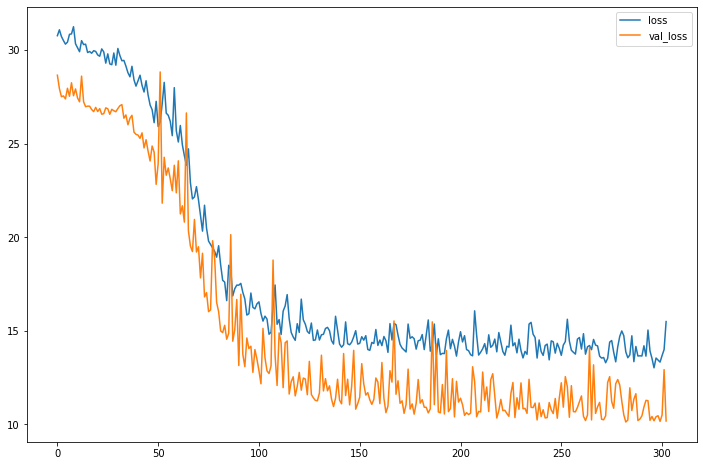

In [56]:
loss_df1=pd.DataFrame(model.history.history)
loss_df1.plot(figsize=(12,8))

In [57]:
pred=model.predict(x_test)

In [58]:
(mean_squared_error(y_test,pred))**0.5 , r2_score(y_test,pred)

(3.1898287794469558, 0.6566634384362846)